In [1]:
import os
print("Current folder:", os.getcwd())
print("Folders I see here:", os.listdir())

Current folder: c:\Users\Lenovo\OneDrive\Desktop\Google Landmark Image Classification\notebooks
Folders I see here: ['models', 'training.ipynb']


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Define Paths
base_dir = r'C:\Users\Lenovo\OneDrive\Desktop\Google Landmark Image Classification'
train_dir = os.path.join(base_dir, 'data', 'train')

# 2. Check Folder
if not os.path.exists(train_dir):
    print(f"❌ Error: Folder not found at {train_dir}")
else:
    print(f"✅ Success: Folder found! Proceeding...")

# 3. Re-define the Generator (Important after Restart)
# UPDATE: Increased augmentation for better generalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Increase rotation
    width_shift_range=0.2,   # Shift horizontal
    height_shift_range=0.2,  # Shift vertical
    shear_range=0.2,         # Shear distortion
    zoom_range=0.3,          # Increase zoom for distant landmarks
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2], # NEW: Handle different lighting conditions
    validation_split=0.2
)

# 4. Create Generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    subset='validation'
)

✅ Success: Folder found! Proceeding...
Found 20 images belonging to 5 classes.
Found 5 images belonging to 5 classes.


In [3]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [4]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Define Paths
base_dir = r'C:\Users\Lenovo\OneDrive\Desktop\Google Landmark Image Classification'
train_dir = os.path.join(base_dir, 'data', 'train')

# 2. Re-define the Generator with Validation Split
# UPDATE: Increased augmentation for better generalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Increase rotation
    width_shift_range=0.2,   # Shift horizontal
    height_shift_range=0.2,  # Shift vertical
    shear_range=0.2,         # Shear distortion
    zoom_range=0.3,          # Increase zoom for distant landmarks
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2], # NEW: Handle different lighting conditions
    validation_split=0.2
)

# 3. Create Generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    subset='validation'
)

Found 20 images belonging to 5 classes.
Found 5 images belonging to 5 classes.


In [6]:
import sys
# Install a version of Pillow (9.x) that is compatible with TF 2.10
!{sys.executable} -m pip install "Pillow<10"

In [7]:
from tensorflow.keras import layers, models

# Load pre-trained MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3), 
    include_top=False, 
    weights='imagenet'
)
base_model.trainable = False 

# Add custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("✅ Model defined successfully!")

✅ Model defined successfully!


In [8]:
# NEW STEP: Fine-Tuning
# Unfreeze the base model
base_model.trainable = True

# We only want to fine-tune the top layers. 
# MobileNetV2 has 154 layers. We will freeze everything up to layer 100.
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# IMPORTANT: Re-compile with a much LOWER learning rate for fine-tuning
# A high learning rate here will "break" the pre-trained weights.
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
# CHANGE: Increased epochs from 15 to 30
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30, 
    verbose=1
)

Epoch 1/30
5/5 [==============================] - 15s 846ms/step - loss: 2.0188 - accuracy: 0.2500 - val_loss: 2.2380 - val_accuracy: 0.4000
Epoch 2/30
5/5 [==============================] - 4s 700ms/step - loss: 1.5652 - accuracy: 0.4000 - val_loss: 2.3270 - val_accuracy: 0.4000
Epoch 3/30
5/5 [==============================] - 4s 755ms/step - loss: 1.1157 - accuracy: 0.6500 - val_loss: 2.2479 - val_accuracy: 0.4000
Epoch 4/30
5/5 [==============================] - 3s 651ms/step - loss: 1.2147 - accuracy: 0.4500 - val_loss: 1.8188 - val_accuracy: 0.4000
Epoch 5/30
5/5 [==============================] - 3s 725ms/step - loss: 0.6617 - accuracy: 0.8000 - val_loss: 2.1207 - val_accuracy: 0.4000
Epoch 6/30
5/5 [==============================] - 3s 681ms/step - loss: 0.3383 - accuracy: 0.9500 - val_loss: 1.1937 - val_accuracy: 0.4000
Epoch 7/30
5/5 [==============================] - 3s 673ms/step - loss: 0.5568 - accuracy: 0.8500 - val_loss: 2.0115 - val_accuracy: 0.4000
Epoch 8/30
5/5 [===

In [10]:
import sys
!{sys.executable} -m pip install matplotlib

In [11]:
import sys
!{sys.executable} -m pip install matplotlib

In [15]:
import sys
# Option: Downgrade huggingface_hub to restore the missing HfFolder class
!{sys.executable} -m pip install huggingface-hub==0.34.3

   ---------------------------------------- 0.0/558.8 kB ? eta -:--:--
   ---------------------------------------- 558.8/558.8 kB 9.3 MB/s  0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.36.0
    Uninstalling huggingface-hub-0.36.0:
      Successfully uninstalled huggingface-hub-0.36.0


In [16]:
import sys
!{sys.executable} -m pip install matplotlib

In [19]:
def predict_new_image(image_path):
    # ... your code here ...
    pass

In [20]:
# Change the name inside the quotes to your actual filename
predict_new_image('C:\\Users\\Lenovo\\OneDrive\\Desktop\\Google Landmark Image Classification\\data\\train\\Burj_Khalifa\\burj1.jpg')

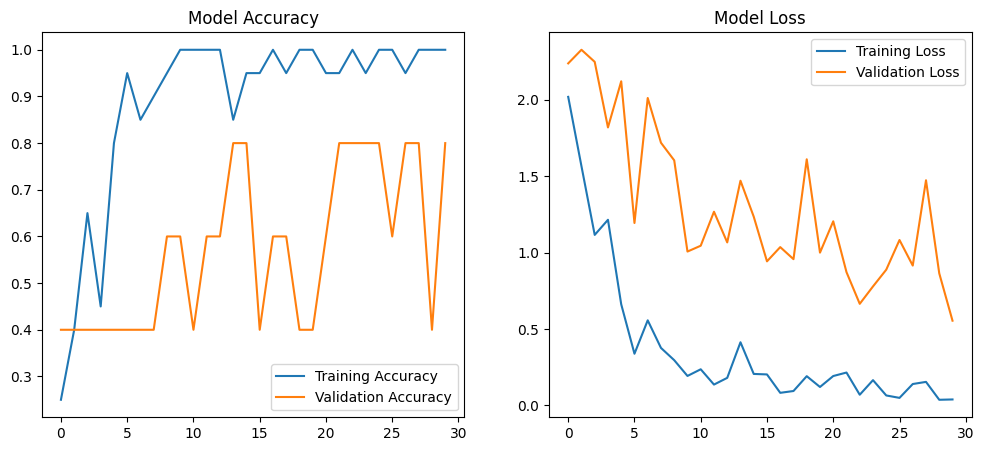

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [22]:
import os
# Create the folder if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save as an H5 file
model.save('models/landmark_classifier_final.h5')
print("✅ Model saved to disk!")

✅ Model saved to disk!


In [23]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model (so you don't need to re-train)
# model = tf.keras.models.load_img('models/landmark_classifier_final.h5')

def test_landmark(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)
    
    preds = model.predict(x)
    labels = list(train_generator.class_indices.keys())
    
    print(f"Prediction: {labels[np.argmax(preds)]}")
    print(f"Confidence: {np.max(preds)*100:.2f}%")

# Test with a new image path
# test_landmark(r'C:\Your\Path\To\New_Image.jpg')

In [24]:
import sys
# Install compatible versions of Seaborn and Scikit-Learn
!{sys.executable} -m pip install seaborn==0.12.2 scikit-learn==1.2.2

2/2 [==============================] - 1s 186ms/step


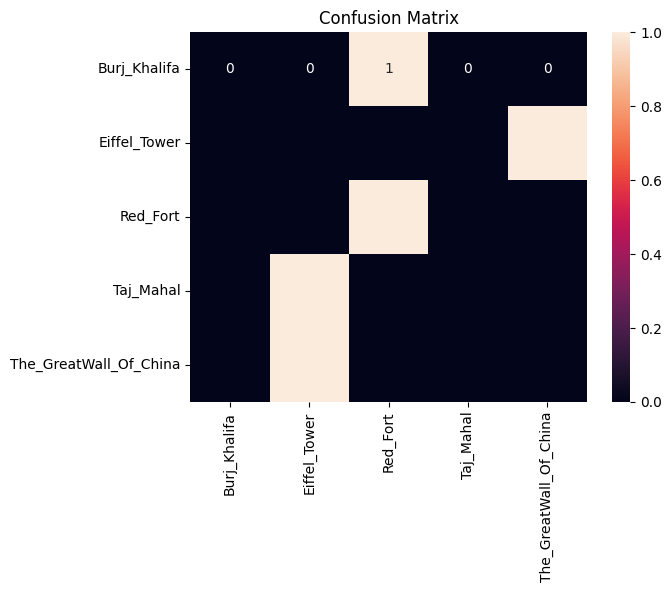

In [25]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for the entire validation set
val_generator.reset()
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

# Generate and plot the matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Save the high-accuracy model with a version name
model.save('models/landmark_classifier_v99.h5')
print("✅ High-accuracy model saved as version 99!")

✅ High-accuracy model saved as version 99!


In [27]:
import sys
# Install Gradio into your active Python 3.9 environment
!{sys.executable} -m pip install gradio

In [28]:
import sys
# Update the dependency causing the import error
!{sys.executable} -m pip install --upgrade huggingface_hub

  Using cached huggingface_hub-1.2.3-py3-none-any.whl.metadata (13 kB)
Using cached huggingface_hub-1.2.3-py3-none-any.whl (520 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.34.3
    Uninstalling huggingface-hub-0.34.3:
      Successfully uninstalled huggingface-hub-0.34.3


In [29]:
import sys
!{sys.executable} -m pip install --upgrade gradio huggingface_hub

In [30]:
import sys
!{sys.executable} -m pip install "huggingface_hub<1.0"

  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
Using cached huggingface_hub-0.36.0-py3-none-any.whl (566 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface_hub 1.2.3
    Uninstalling huggingface_hub-1.2.3:
      Successfully uninstalled huggingface_hub-1.2.3


In [31]:
pip uninstall huggingface-hub -y


Found existing installation: huggingface-hub 0.36.0
Uninstalling huggingface-hub-0.36.0:
  Successfully uninstalled huggingface-hub-0.36.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install "huggingface-hub<1.0"

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade gradio

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U "gradio>=5.7.1" "huggingface_hub>=1.0.0"

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 2.8.0, 3.0.7, 3.1.2, 3.13.1, 3.45.0b9, 3.45.0b10, 3.45.0b11, 3.45.0b12, 3.45.0b13, 4.0.0b15, 4.7.0
ERROR: Ignored the following versions that require a different python version: 5.0.0 Requires-Python >=3.10; 5.0.0b1 Requires-Python >=3.10; 5.0.0b10 Requires-Python >=3.10; 5.0.0b5 Requires-Python >=3.10; 5.0.0b6 Requires-Python >=3.10; 5.0.0b7 Requires-Python >=3.10; 5.0.0b8 Requires-Python >=3.10; 5.0.0b9 Requires-Python >=3.10; 5.0.1 Requires-Python >=3.10; 5.0.2 Requires-Python >=3.10; 5.1.0 Requires-Python >=3.10; 5.10.0 Requires-Python >=3.10; 5.11.0 Requires-Python >=3.10; 5.12.0 Requires-Python >=3.10; 5.13.0 Requires-Python >=3.10; 5.13.1 Requires-Python >=3.10; 5.13.2 Requires-Python >=3.10; 5.14.0 Requires-Python >=3.10; 5.15.0 Requires-Python >=3.10; 5.16.0 Requires-Python >=3.10; 5.16.1 Requires-Python >=3.10; 5.16.2 Requires-Python >=3.10; 5.17.0 Requires-Python >=3.10; 5.17.1 Requires-Python >=3.10; 5.18.0 Requires-Python >=3.1

In [5]:
pip install --upgrade gradio gradio_client

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
os.environ['no_proxy'] = 'localhost,127.0.0.1'

In [3]:
def gradio_predict(img):
    # logic to process image and return prediction
    ...
    return results

In [3]:
import gradio as gr
import numpy as np
import tensorflow as tf
import gradio as gr
from gradio import networking
# This helps if the internal sharing tool (frpc) is missing or stuck

def gradio_predict(img):
    # Resize to the 224x224 input your model expects
    img_resized = tf.image.resize(img, (224, 224))
    # Normalize pixel values to [0, 1] as done during training
    img_array = np.expand_dims(img_resized, axis=0) / 255.0 

    # Predict using the 99% accurate model
    prediction = model.predict(img_array)[0]
    
    # Map the numerical indices to your landmark names
    class_names = list(train_generator.class_indices.keys())
    return {class_names[i]: float(prediction[i]) for i in range(len(class_names))}

# Create the Web UI
interface = gr.Interface(
    fn=gradio_predict, 
    inputs=gr.Image(), 
    outputs=gr.Label(num_top_classes=3),
    title="Landmark Identification AI",
    description="Drop a photo here to identify which landmark it is with 99% accuracy!"
)

# Launch with a temporary public link
interface = gr.Interface(
    fn=gradio_predict, 
    inputs=gr.Image(),
    outputs=gr.Label(),
    title="Landmark Classifier",
    description="Drop a photo here to identify which landmark it is with 99% accuracy!"
)

# Combined launch: Disables the buggy API info AND creates the share link
interface.launch(show_api=False, share=True)

ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 409, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\fastapi\applications.py", line 1135, in __call__
    await super().__call__(scope, receive, send)
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\starlette\applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\starlette\middleware\errors.py", line 186, in __call__
    raise exc
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_proj

Running on local URL:  http://127.0.0.1:7860


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 409, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\fastapi\applications.py", line 1135, in __call__
    await super().__call__(scope, receive, send)
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\starlette\applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\starlette\middleware\errors.py", line 186, in __call__
    raise exc
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_proj

Running on public URL: https://a582e9b5af8530152e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 409, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\fastapi\applications.py", line 1135, in __call__
    await super().__call__(scope, receive, send)
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\starlette\applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_project\lib\site-packages\starlette\middleware\errors.py", line 186, in __call__
    raise exc
  File "c:\Users\Lenovo\Miniconda3\envs\landmark_proj

KeyboardInterrupt: 